In [6]:
import numpy as np

def sum_squares_error(y, t) : # 파라미터들은 넘파이배열
    return 0.5 * np.sum((y - t) ** 2)

# 차례대로 0 ~ 9에 해당하는 정답과 예측확률
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("2를 정답으로 추정했을 때 SSE : ", sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("7를 정답으로 추정했을 때 SSE : " ,sum_squares_error(np.array(y), np.array(t)))

2를 정답으로 추정했을 때 SSE :  0.09750000000000003
7를 정답으로 추정했을 때 SSE :  0.5975


In [17]:
def cross_entropy_error(y, t) :
    delta = 1e-7 # log 0이 되는것을 방지하기 위해 아주 작은 값을 더해준다.
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("2를 정답으로 예측했을 때 크로스엔트로피 : ", cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("7를 정답으로 예측했을 때 크로스엔트로피 : ",  cross_entropy_error(np.array(y), np.array(t)))

2를 정답으로 예측했을 때 크로스엔트로피 :  0.510825457099338
7를 정답으로 예측했을 때 크로스엔트로피 :  2.302584092994546


In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape) # 훈련데이터
print(t_train.shape) # 정답레이블

(60000, 784)
(60000, 10)


In [26]:
# 미니배치 학습
train_size = x_train.shape[0] # 60000개의 데이터 훈련
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # [0 ~ 59999] 숫자 중 10개의 숫자 뽑아냄(10개의 인덱스 추출)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [46]:
# 배치용 크로스엔트로피 구현
def cross_entropy_error(y, t) :
    if y.ndim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [65]:
# 배치용 크로스엔트로피 구현(정답레이블이 확률이 아닌 숫자로 주어졌을 때)
def cross_entropy_error(y, t) :
    if y.ndim == 1 :
        y = y.reshape(1, y.size)
        t = y.reshape(1, t.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [72]:
def numerical_diff(f, x) :
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

def function_1(x) :
    return 0.01 * x ** 2 + 0.1 * x

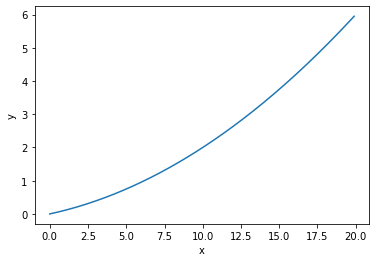

In [73]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [74]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [75]:
def function_2(x) :
    return x[0] ** 2 + x[1] ** 2

In [76]:
# 편미분
def temp_func1(x1) :
    return x1 ** 2 + 4.0 ** 2.0

numerical_diff(temp_func1, 3.0)

6.00000000000378

In [77]:
def temp_func2(x2) :
    return 3.0 ** 2.0 + x2 ** 2

numerical_diff(temp_func2, 4.0)

7.999999999999119

In [126]:
# gradient 구하기
def numerical_gradient(f, x) :
    h = 1e-4
    gradient = np.zeros_like(x)
    
    for index in range(x.size) :
        temp_val = x[index]
        
        x[index] = temp_val + h
        fxh1 = f(x)
        
        x[index] = temp_val - h
        fxh2 = f(x)
        
        gradient[index] = (fxh1 - fxh2) / (2 * h)
        x[index] = temp_val
        
    return gradient

In [127]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


In [128]:
# 경사하강법
def gradient_descent(f, x_init, lr = 0.01, step_num = 100) :
    x = init_x
    
    for i in range(step_num) :
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [129]:
def function_2(x) :
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [133]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet :
    def __init__(self) :
        self.W = np.random.randn(2, 3) # 사이즈 2, 3인 표준정규분포
        
    def predict(self, x) :
        return np.dot(x, self.W)
    
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [134]:
net = simpleNet()
print(net.W)

[[ 0.23059175  0.95601121 -0.68601935]
 [-0.16853557  0.99832202  0.55042515]]


In [135]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.01332696  1.47209654  0.08377102]


In [136]:
np.argmax(p)

1

In [137]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.7775923317137294

In [138]:
def f(W) :
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

# f = lambda x : net.loss(x, t)
# dW = numerical_gradient(f, net.W)

[[ 0.09204137  0.4065316  -0.49857297]
 [ 0.13806206  0.6097974  -0.74785945]]


In [142]:
# 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet :
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std = 0.01) :
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x) :
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력데이터, t : 정답레이블
    def loss(self, x, t) :
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t) :
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t) :
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [144]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test)  = \
    load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num) :
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2') :
        network.params[key] -= learning_rate * grad[key]
        
    # 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test)  = \
    load_mnist(normalize = True, one_hot_label = True)



network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)
# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num) :
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2') :
        network.params[key] -= learning_rate * grad[key]
        
    # 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에촉당 정확도 계산
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))